In [ ]:
import locale
locale.getpreferredencoding = lambda do_setlocale=False: "UTF-8"

def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename} && rm -rf /tmp/cookies.txt

download_from_drive("https://drive.google.com/file/d/1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr/view?usp=sharing", "top10k_imdb_mod.csv")


def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename+".rar"} && rm -rf /tmp/cookies.txt
  !unrar x -Y {"/content/"+filename+".rar"} {"/content/"+filename+"/"}

download_from_drive("https://drive.google.com/file/d/1krZbtFXLW2711hZLq7xO0iXsUTBcwNSQ/view?usp=sharing", "data")

--2023-10-17 14:58:25--  https://docs.google.com/uc?export=download&confirm=&id=1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr
Resolving docs.google.com (docs.google.com)... 74.125.201.101, 74.125.201.139, 74.125.201.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.201.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mr17lpuf7hcimiinsuu7nt8ilfh6m69p/1697554650000/02440328774490686871/*/1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr?e=download&uuid=02a3c93d-d7ca-47f7-a586-187eda90df50 [following]
--2023-10-17 14:58:26--  https://doc-0c-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mr17lpuf7hcimiinsuu7nt8ilfh6m69p/1697554650000/02440328774490686871/*/1dFu85rrfeDiBabCISrfCPw-Bw1KV7mgr?e=download&uuid=02a3c93d-d7ca-47f7-a586-187eda90df50
Resolving doc-0c-1k-docs.googleusercontent.com (doc-0c-1k-docs.googleusercontent.com)... 173.194.193.132, 

In [ ]:
import pandas as pd
import re
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("./top10k_imdb_mod.csv", encoding="utf-8", lineterminator="\n")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [ ]:
def genre_fix(x):
  tags = re.findall(r"\w+\s*\w+",x)
  if len(tags)>0:
    x = tags[0]
  else:
    x = None
  return x

df.genre = df.genre.apply(genre_fix)
df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,Science Fiction,After finding a host body in investigative rep...,424000000,97.0,NaN
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,Action,The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,Action,"Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,Action,A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,Comedy,A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.


In [ ]:
filter_df = df[~df.tagline.isna()]
filter_df = filter_df[~filter_df.genre.isna()]
filter_df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,Action,The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,Action,"Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,Action,A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,Comedy,A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
5,5,5,574060,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347,Action,In her turbulent life as a professional assass...,344931,114.0,Revenge is best served ice cold.


In [ ]:
len(filter_df)

7072

In [ ]:
filter_df.genre.unique()

array(['Action', 'Comedy', 'Science Fiction', 'Horror', 'Animation',
       'Crime', 'Thriller', 'Family', 'Adventure', 'Western', 'Romance',
       'Drama', 'Fantasy', 'War', 'Documentary', 'Mystery', 'Music',
       'History', 'TV Movie'], dtype=object)

<Axes: xlabel='count', ylabel='genre'>

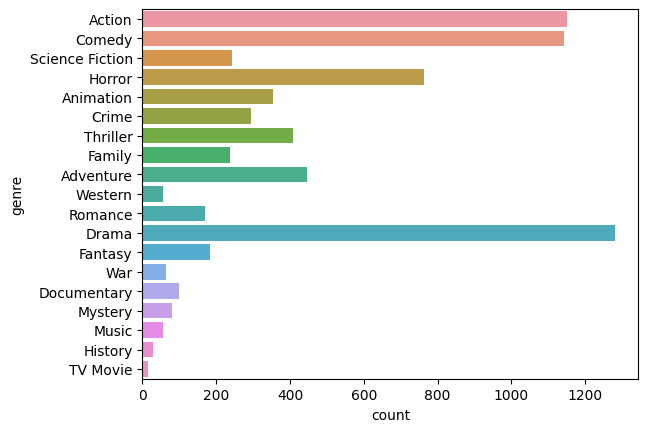

In [ ]:
sns.countplot(y=filter_df.genre)

In [ ]:
filter_df = filter_df[filter_df.genre.isin(["Action", "Comedy", "Horror", "Drama"])]

In [ ]:
catDict = dict(zip(filter_df.genre.unique(),range(len(filter_df.genre.unique()))))

In [ ]:
catDict

{'Action': 0, 'Comedy': 1, 'Horror': 2, 'Drama': 3}

<Axes: xlabel='count', ylabel='genre'>

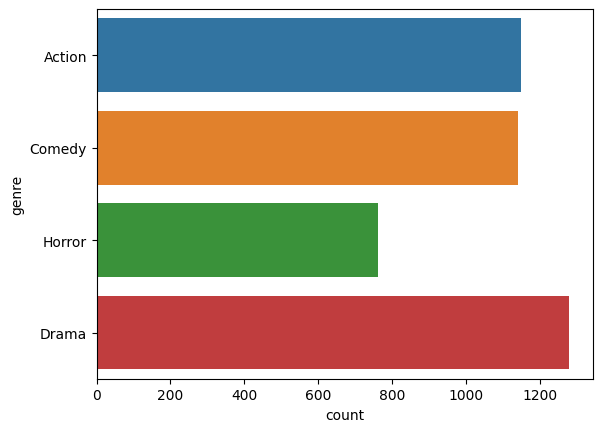

In [ ]:
sns.countplot(y=filter_df.genre)

In [ ]:
filter_df.genre = filter_df.genre.apply(lambda x: catDict[x])

filter_df.head()

,Unnamed: 0.1,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
1,1,1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,0,The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,2,2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,0,"Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,3,3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,0,A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,4,4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,1,A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
5,5,5,574060,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347,0,In her turbulent life as a professional assass...,344931,114.0,Revenge is best served ice cold.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
d_train, d_test = train_test_split(filter_df[["tagline","genre"]],test_size=0.1)

In [ ]:
d_train

,tagline,genre
3638,Survival is key,3
5750,Sketch for a Popular Film,1
2678,Unleash your inner beast!,1
7554,A love story... With strings attached!,1
5152,Only their mother can tell them apart.,1
...,...,...
7407,Nothing is inconceivable.,1
5349,A Revolution Has Begun...,0
8389,The only thing more terrifying than Mother Nat...,2
4220,"Half Man, Half Machine, No Mercy",0


In [ ]:
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleaning_text(text):
    stop_words = stopwords.words("english")

    # remove stopwords
    text = text.split()
    text = " ".join([word.lower() for word in text if not word in stop_words])

    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")

    return text


In [ ]:
d_train.tagline = d_train.tagline.apply(cleaning_text)
d_test.tagline = d_test.tagline.apply(cleaning_text)
d_train.head()

,tagline,genre
3638,survival key,3
5750,sketch popular film,1
2678,unleash inner beast,1
7554,a love story with strings attached,1
5152,only mother tell apart,1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

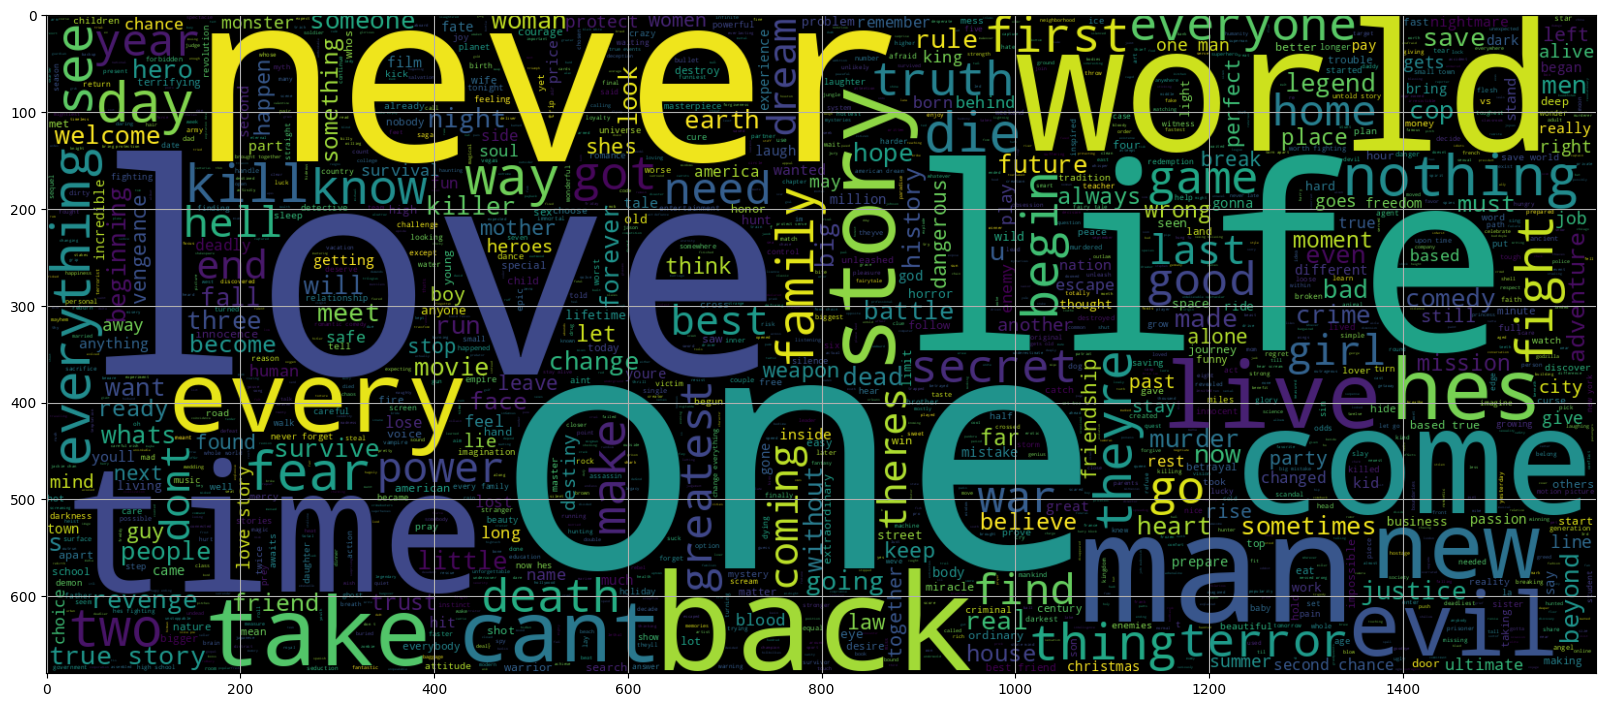

In [ ]:
plt.figure(figsize = (20,20))
wordcould = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(d_train.tagline))
plt.imshow(wordcould,interpolation = 'bilinear')
plt.grid(None)

In [ ]:
max_len_words = max(list(d_train.tagline.apply(len)))
print(max_len_words)

168


In [ ]:
from collections import Counter

In [ ]:
#count unique words
def count_unique_words(corpus):
  count = Counter()
  for i in corpus.values:
    for word in i.split():
      count[word]+=1
  return count

text_cnt = count_unique_words(d_train.tagline)

In [ ]:
number_of_unique_words = len(text_cnt)

In [ ]:
number_of_unique_words

4312

In [ ]:
text_cnt

Counter({'survival': 16,
         'key': 3,
         'sketch': 1,
         'popular': 2,
         'film': 13,
         'unleash': 5,
         'inner': 6,
         'beast': 3,
         'a': 290,
         'love': 198,
         'story': 134,
         'with': 16,
         'strings': 1,
         'attached': 1,
         'only': 22,
         'mother': 16,
         'tell': 9,
         'apart': 14,
         'comedy': 36,
         'family': 57,
         'fights': 5,
         'little': 33,
         'differently': 1,
         'the': 600,
         'worlds': 22,
         'talked': 1,
         'movie': 23,
         'today': 10,
         'queer': 1,
         'porn': 1,
         'crossover': 1,
         'time': 110,
         'play': 14,
         'unspeakable': 2,
         'secrets': 17,
         'hidden': 2,
         'within': 5,
         'forbidden': 6,
         'city': 18,
         'last': 37,
         'man': 98,
         'earth': 24,
         'alone': 20,
         'thrill': 2,
         'hunt': 10,
 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, callbacks
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
def tokenizer(x_train, y_train, max_len_word):
    # because the data distribution is imbalanced, "stratify" is used
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train,
                                                      test_size=.2, shuffle=True,
                                                      stratify=y_train, random_state=0)

    # Tokenizer
    tokenizer = Tokenizer(num_words=number_of_unique_words)
    tokenizer.fit_on_texts(X_train)
    tokenizer_index = tokenizer.word_index
    word_dict = {num : val for (val, num) in tokenizer_index.items()}

    # Sequence data
    train_sequences = tokenizer.texts_to_sequences(X_train)
    train_padded = pad_sequences(train_sequences,
                                 maxlen=max_len_word,
                                 truncating='post',
                                 padding='post')

    val_sequences = tokenizer.texts_to_sequences(X_val)
    val_padded = pad_sequences(val_sequences,
                                maxlen=max_len_word,
                                truncating='post',
                                padding='post', )

    print(train_padded.shape)
    print(val_padded.shape)
    print('Total words: {}'.format(len(word_dict)))
    return train_padded, val_padded, y_train, y_val, word_dict, tokenizer

X_train, X_val, y_train, y_val, word_dict, tokenizer = tokenizer(d_train.tagline, d_train.genre, max_len_words)

(3121, 168)
(781, 168)
Total words: 3758


In [ ]:
tokenized_unique_words = len(word_dict)

In [ ]:
num_classes = d_train.genre.nunique()
print(num_classes)

4


In [ ]:
model = Sequential()
model.add(layers.Embedding(tokenized_unique_words, 64, input_length=max_len_words))
model.add(layers.LSTM(64, return_sequences=True, name='lstm_layer'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 168, 64)           240512    
                                                                 
 lstm_layer (LSTM)           (None, 168, 64)           33024     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                        

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:

early_stopping = callbacks.EarlyStopping(monitor ="val_loss",
                                         mode ="min", patience=3)

history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    shuffle=True)


Epoch 1/50
25/25 [==============================] - 10s 254ms/step - loss: 1.3880 - accuracy: 0.2208 - val_loss: 1.3857 - val_accuracy: 0.3201
Epoch 2/50
25/25 [==============================] - 4s 154ms/step - loss: 1.3841 - accuracy: 0.2871 - val_loss: 1.3827 - val_accuracy: 0.3137
Epoch 3/50
25/25 [==============================] - 3s 126ms/step - loss: 1.3809 - accuracy: 0.2845 - val_loss: 1.3797 - val_accuracy: 0.3291
Epoch 4/50
25/25 [==============================] - 2s 78ms/step - loss: 1.3777 - accuracy: 0.2848 - val_loss: 1.3761 - val_accuracy: 0.2714
Epoch 5/50
25/25 [==============================] - 2s 95ms/step - loss: 1.3734 - accuracy: 0.2877 - val_loss: 1.3726 - val_accuracy: 0.2638
Epoch 6/50
25/25 [==============================] - 2s 83ms/step - loss: 1.3708 - accuracy: 0.2794 - val_loss: 1.3699 - val_accuracy: 0.3022
Epoch 7/50
25/25 [==============================] - 1s 49ms/step - loss: 1.3682 - accuracy: 0.2922 - val_loss: 1.3688 - val_accuracy: 0.2945
Epoch 8/5

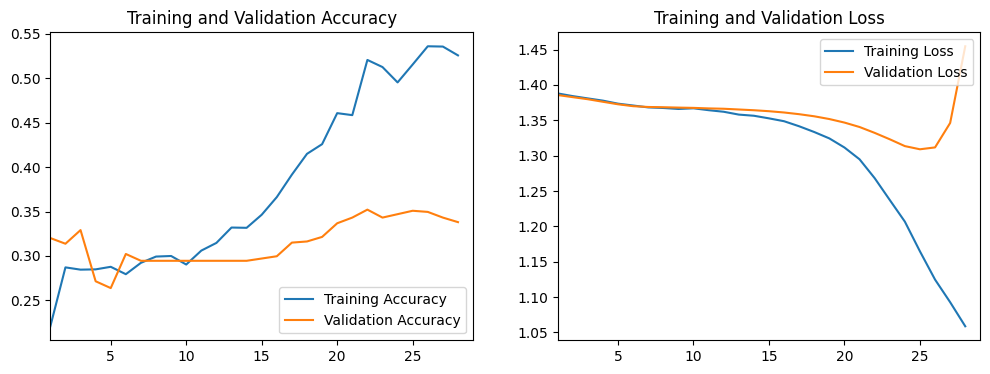

In [ ]:
# Plotting accuracy and val_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_acc)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_sequences = tokenizer.texts_to_sequences(d_test.tagline)
test_padded = pad_sequences(test_sequences,
                            maxlen=max_len_words,
                            truncating='post',
                            padding='post', )

In [ ]:
model.evaluate(test_padded,d_test.genre)

14/14 [==============================] - 0s 6ms/step - loss: 1.4251 - accuracy: 0.3433


[1.4250683784484863, 0.34331798553466797]

In [ ]:
!pip install --upgrade gensim

In [ ]:
!wget --no-check-certificate "https://ikelte-my.sharepoint.com/:u:/g/personal/natabara_inf_elte_hu/Ee9HETZu5o1BkP8EqaKtMigB_KjvuD4vQ5WpoDOG4gLISw?e=oNbmMt&download=1" -O cc.en.64.bin

--2023-10-17 15:00:07--  https://ikelte-my.sharepoint.com/:u:/g/personal/natabara_inf_elte_hu/Ee9HETZu5o1BkP8EqaKtMigB_KjvuD4vQ5WpoDOG4gLISw?e=oNbmMt&download=1
Resolving ikelte-my.sharepoint.com (ikelte-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to ikelte-my.sharepoint.com (ikelte-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/natabara_inf_elte_hu/Documents/cc.en.64.bin?ga=1 [following]
--2023-10-17 15:00:07--  https://ikelte-my.sharepoint.com/personal/natabara_inf_elte_hu/Documents/cc.en.64.bin?ga=1
Reusing existing connection to ikelte-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1573176312 (1.5G) [application/octet-stream]
Saving to: ‘cc.en.64.bin’

cc.en.64.bin        100%[===================>]   1.46G  57.6MB/s    in 29s     

2023-10-17 15:00:37 (51.5 MB/s) - ‘cc.en.64.bin’ saved [1573176312/1573176312]



In [ ]:
from gensim.models.fasttext import load_facebook_model

vectors = load_facebook_model("./cc.en.64.bin").wv

In [ ]:
word_dict.values()

dict_values(['the', 'a', 'one', 'you', 'love', 'never', 'story', 'life', 'it', 'time', 'world', 'no', 'in', 'they', 'get', 'this', 'man', 'its', 'every', 'back', 'new', 'he', 'what', 'like', 'true', 'evil', 'for', 'cant', 'everything', 'nothing', 'hes', 'ever', 'take', 'she', 'theyre', 'some', 'to', 'when', 'family', 'go', 'be', 'there', 'best', 'die', 'all', 'fear', 'if', 'two', 'is', 'her', 'his', 'kill', 'truth', 'comes', 'day', 'death', 'see', 'game', 'out', 'now', 'hell', 'an', 'up', 'first', 'war', 'live', 'home', 'way', 'everyone', 'come', 'power', 'how', 'dont', 'make', 'fight', 'got', 'save', 'not', 'greatest', 'your', 'good', 'terror', 'begins', 'know', 'comedy', 'going', 'last', 'coming', 'and', 'theres', 'would', 'made', 'us', 'but', 'night', 'dead', 'revenge', 'justice', 'sometimes', 'find', 'again', 'hero', 'dream', 'on', 'who', 'bad', 'real', 'big', 'years', 'will', 'them', 'little', 'can', 'without', 'crime', 'people', 'legend', 'battle', 'their', 'even', 'thing', 'end'

In [ ]:
for w in word_dict.values()

In [ ]:
preload_embedding = [vectors[w] for w in word_dict.values()]


In [ ]:
preload_embedding = np.stack(preload_embedding)
preload_embedding.shape

(3758, 64)

In [ ]:
preloaded_model = Sequential()
preloaded_model.add(layers.Embedding(tokenized_unique_words, 64, input_length=max_len_words, weights=[preload_embedding]))
preloaded_model.add(layers.LSTM(64, return_sequences=True, name='lstm_layer'))
preloaded_model.add(layers.GlobalMaxPool1D())
preloaded_model.add(layers.Dense(64, activation='relu'))
preloaded_model.add(layers.Dropout(0.2))
preloaded_model.add(layers.Dense(4, activation='softmax'))

In [ ]:
preloaded_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
preloaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 168, 64)           240512    
                                                                 
 lstm_layer (LSTM)           (None, 168, 64)           33024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                      

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor ="val_loss",
                                         mode ="min", patience=3)

history = preloaded_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    shuffle=True)

Epoch 1/50
25/25 [==============================] - 8s 235ms/step - loss: 1.3795 - accuracy: 0.2595 - val_loss: 1.3765 - val_accuracy: 0.2817
Epoch 2/50
25/25 [==============================] - 4s 155ms/step - loss: 1.3730 - accuracy: 0.2836 - val_loss: 1.3724 - val_accuracy: 0.2958
Epoch 3/50
25/25 [==============================] - 2s 95ms/step - loss: 1.3706 - accuracy: 0.2948 - val_loss: 1.3703 - val_accuracy: 0.2945
Epoch 4/50
25/25 [==============================] - 2s 76ms/step - loss: 1.3678 - accuracy: 0.2925 - val_loss: 1.3694 - val_accuracy: 0.2945
Epoch 5/50
25/25 [==============================] - 2s 71ms/step - loss: 1.3683 - accuracy: 0.2945 - val_loss: 1.3691 - val_accuracy: 0.2945
Epoch 6/50
25/25 [==============================] - 1s 45ms/step - loss: 1.3682 - accuracy: 0.2900 - val_loss: 1.3687 - val_accuracy: 0.2945
Epoch 7/50
25/25 [==============================] - 1s 36ms/step - loss: 1.3667 - accuracy: 0.2993 - val_loss: 1.3685 - val_accuracy: 0.2945
Epoch 8/50


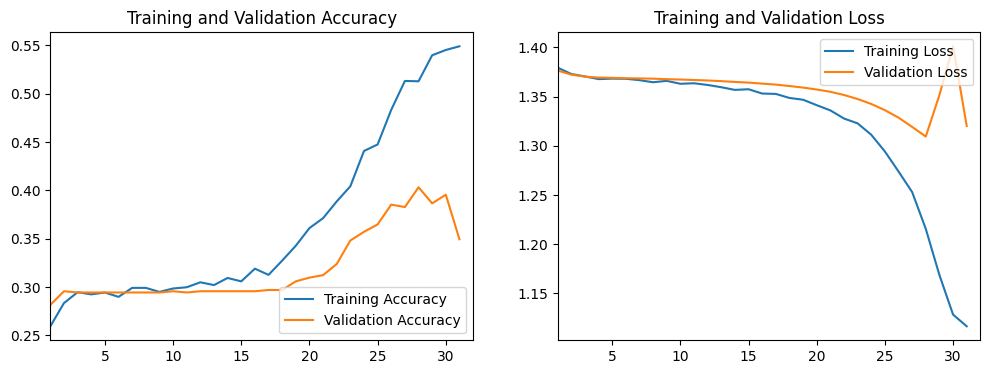

In [ ]:
# Plotting accuracy and val_accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(val_acc)+1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(1, len(val_acc)+1)
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preloaded_model.evaluate(test_padded, d_test.genre)

14/14 [==============================] - 0s 8ms/step - loss: 1.3420 - accuracy: 0.3618


[1.3420042991638184, 0.36175113916397095]